In [148]:
import numpy as np
import torch

In [149]:
import importlib, project_utils
importlib.reload(project_utils)

<module 'project_utils' from '/Users/adipistiner/PycharmProjects/dl-assignment-3/project_utils.py'>

# uploading data + splitting to train and test

In [134]:
import numpy as np
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
y = y.astype(int).values

print(X.shape)
print(y.shape)

X = ((X / 255.) - .5) * 2

# #divide to test and train
# from sklearn.model_selection import train_test_split
# 
# X_temp, X_test, y_temp, y_test = train_test_split(
#     X, y, test_size=10000, random_state=123, stratify=y)
# 
# X_train, X_valid, y_train, y_valid = train_test_split(
#     X_temp, y_temp, test_size=5000, random_state=123, stratify=y_temp)
# 
# 
# # optional to free up some memory by deleting non-used arrays:
# del X_temp, y_temp, X, y

(70000, 784)
(70000,)


In [135]:
from sklearn.model_selection import train_test_split

# Required split: 70% train_full, 30% test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123, stratify=y
)

# 10% Validation split (out of  the 70% train)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.10, random_state=123, stratify=y_train_full
)

print("Train:", X_train.shape, "Valid:", X_valid.shape, "Test:", X_test.shape)


Train: (44100, 784) Valid: (4900, 784) Test: (21000, 784)


In [136]:
#global hyperparams for the models
np.random.seed(123)

minibatch_size = 100
learning_rate = 0.1


===============================
MODEL 1 — Original ch11 (1 hidden layer)
===============================

In [137]:
from project_utils import NeuralNetMLP, train, macro_auc_ovr

In [138]:
# num_epochs = 50

In [139]:
epochs_1h = 20  # as in class slides, keeping it the same for comparison between models

model_1h = NeuralNetMLP(
    num_features=784,
    num_hidden=500,
    num_classes=10
)

loss_1h, train_acc_1h, valid_acc_1h = train(
    model_1h,
    X_train, y_train,
    X_valid, y_valid,
    num_epochs=epochs_1h,
    learning_rate=learning_rate,
    minibatch_size=minibatch_size
)

[1H] Epoch: 001/020 | Train MSE: 0.02 | Train Accuracy: 87.34% | Valid Accuracy: 86.84%
[1H] Epoch: 002/020 | Train MSE: 0.02 | Train Accuracy: 90.51% | Valid Accuracy: 90.35%
[1H] Epoch: 003/020 | Train MSE: 0.01 | Train Accuracy: 91.39% | Valid Accuracy: 91.33%
[1H] Epoch: 004/020 | Train MSE: 0.01 | Train Accuracy: 92.17% | Valid Accuracy: 91.76%
[1H] Epoch: 005/020 | Train MSE: 0.01 | Train Accuracy: 92.65% | Valid Accuracy: 92.14%
[1H] Epoch: 006/020 | Train MSE: 0.01 | Train Accuracy: 93.06% | Valid Accuracy: 92.61%
[1H] Epoch: 007/020 | Train MSE: 0.01 | Train Accuracy: 93.55% | Valid Accuracy: 92.86%
[1H] Epoch: 008/020 | Train MSE: 0.01 | Train Accuracy: 93.74% | Valid Accuracy: 93.14%
[1H] Epoch: 009/020 | Train MSE: 0.01 | Train Accuracy: 94.01% | Valid Accuracy: 93.31%
[1H] Epoch: 010/020 | Train MSE: 0.01 | Train Accuracy: 94.15% | Valid Accuracy: 93.27%
[1H] Epoch: 011/020 | Train MSE: 0.01 | Train Accuracy: 94.58% | Valid Accuracy: 93.59%
[1H] Epoch: 012/020 | Train MSE:

In [140]:
#evaluate on test:
_, probas_1h = model_1h.forward(X_test)
pred_1h = np.argmax(probas_1h, axis=1)

test_acc_1h = (pred_1h == y_test).mean()
test_auc_1h = macro_auc_ovr(y_test, probas_1h)

print(f"[Scratch 1-hidden] Test Acc={test_acc_1h:.4f} | Macro-AUC={test_auc_1h:.4f}")


[Scratch 1-hidden] Test Acc=0.9478 | Macro-AUC=0.9966


===============================
MODEL 2 — Revised ch11 (2 hidden layers)
===============================

In [141]:
from project_utils import NeuralNetMLP2Hidden, train_2hidden

In [142]:
epochs_2h = 20

model_2h = NeuralNetMLP2Hidden(
    num_features=784,
    num_hidden1=500,
    num_hidden2=500,
    num_classes=10
)

np.random.seed(123)
loss_2h, train_acc_2h, valid_acc_2h = train_2hidden(
    model_2h,
    X_train, y_train,
    X_valid, y_valid,
    num_epochs=epochs_2h,
    learning_rate=learning_rate,
    minibatch_size=minibatch_size
)


[2H] Epoch: 001/020 | Train MSE: 0.03 | Train Accuracy: 84.23% | Valid Accuracy: 83.63%
[2H] Epoch: 002/020 | Train MSE: 0.02 | Train Accuracy: 89.28% | Valid Accuracy: 89.39%
[2H] Epoch: 003/020 | Train MSE: 0.02 | Train Accuracy: 90.63% | Valid Accuracy: 90.82%
[2H] Epoch: 004/020 | Train MSE: 0.01 | Train Accuracy: 91.35% | Valid Accuracy: 91.51%
[2H] Epoch: 005/020 | Train MSE: 0.01 | Train Accuracy: 91.95% | Valid Accuracy: 91.96%
[2H] Epoch: 006/020 | Train MSE: 0.01 | Train Accuracy: 92.44% | Valid Accuracy: 92.39%
[2H] Epoch: 007/020 | Train MSE: 0.01 | Train Accuracy: 92.90% | Valid Accuracy: 92.65%
[2H] Epoch: 008/020 | Train MSE: 0.01 | Train Accuracy: 93.07% | Valid Accuracy: 92.88%
[2H] Epoch: 009/020 | Train MSE: 0.01 | Train Accuracy: 93.33% | Valid Accuracy: 92.88%
[2H] Epoch: 010/020 | Train MSE: 0.01 | Train Accuracy: 93.57% | Valid Accuracy: 93.06%
[2H] Epoch: 011/020 | Train MSE: 0.01 | Train Accuracy: 94.02% | Valid Accuracy: 93.41%
[2H] Epoch: 012/020 | Train MSE:

In [143]:
#evaluate on test
_, _, probas_2h = model_2h.forward(X_test)
pred_2h = np.argmax(probas_2h, axis=1)

test_acc_2h = (pred_2h == y_test).mean()
test_auc_2h = macro_auc_ovr(y_test, probas_2h)

print(f"[2-hidden] Test Accuracy={test_acc_2h:.4f} | Macro-AUC={test_auc_2h:.4f}")


[2-hidden] Test Accuracy=0.9444 | Macro-AUC=0.9962


===============================
MODEL 3 — Framework ANN (PyTorch)
===============================

In [150]:
from project_utils import train_torch_mse_softmax

torch_model, test_acc_torch, test_auc_torch, torch_train_acc_hist, torch_test_acc_hist, torch_probas_test = train_torch_mse_softmax(
    X_train_full, y_train_full,
    X_test, y_test,
    lr=0.1,
    epochs=50,
    batch_size=100
)

print(f"[PyTorch ANN] Test Acc={test_acc_torch:.4f} | Macro-AUC={test_auc_torch:.4f}")

[PyTorch-MSE] Epoch 001/050 | Train Acc: 11.25% | Test Acc: 11.25%
[PyTorch-MSE] Epoch 010/050 | Train Acc: 27.42% | Test Acc: 27.30%
[PyTorch-MSE] Epoch 020/050 | Train Acc: 30.66% | Test Acc: 30.40%
[PyTorch-MSE] Epoch 030/050 | Train Acc: 61.65% | Test Acc: 61.54%
[PyTorch-MSE] Epoch 040/050 | Train Acc: 81.80% | Test Acc: 81.84%
[PyTorch-MSE] Epoch 050/050 | Train Acc: 86.73% | Test Acc: 86.66%
[PyTorch ANN] Test Acc=0.8666 | Macro-AUC=0.9832


===============================
FINAL COMPARISON (Q4)
===============================

In [151]:
print("\n=== FINAL COMPARISON (70/30 TEST SET) ===")
print(f"1-hidden : Accuracy={test_acc_1h:.4f} | Macro-AUC={test_auc_1h:.4f}")
print(f"2-hidden : Accuracy={test_acc_2h:.4f} | Macro-AUC={test_auc_2h:.4f}")
print(f"PyTorch ANN : Accuracy={test_acc_torch:.4f} | Macro-AUC={test_auc_torch:.4f}")



=== FINAL COMPARISON (70/30 TEST SET) ===
1-hidden : Accuracy=0.9478 | Macro-AUC=0.9966
2-hidden : Accuracy=0.9444 | Macro-AUC=0.9962
PyTorch ANN : Accuracy=0.8666 | Macro-AUC=0.9832


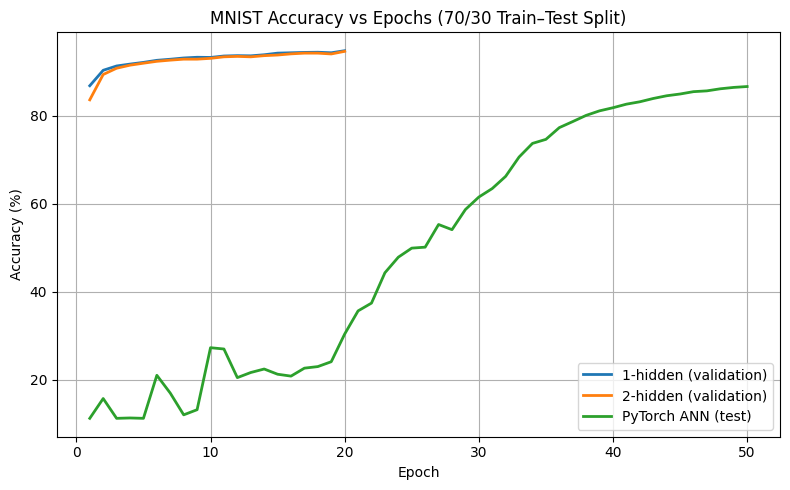

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Scratch – 1 hidden layer
plt.plot(
    range(1, len(valid_acc_1h) + 1),
    valid_acc_1h,
    label="1-hidden (validation)",
    linewidth=2
)

# Scratch – 2 hidden layers
plt.plot(
    range(1, len(valid_acc_2h) + 1),
    valid_acc_2h,
    label="2-hidden (validation)",
    linewidth=2
)

# PyTorch ANN
plt.plot(
    range(1, len(torch_test_acc_hist) + 1),
    torch_test_acc_hist,
    label="PyTorch ANN (test)",
    linewidth=2
)

plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("MNIST Accuracy vs Epochs (70/30 Train–Test Split)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
